### Import all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
x = df.drop(['Id','Species'], axis = 1)

In [8]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### K-means object

In [9]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=5, random_state=0)

In [15]:
labels = km.fit_predict(x)

In [16]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 0, 3, 3, 0, 2, 0, 3, 0,
       3, 3, 3, 4, 3, 3, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0, 4, 4, 3, 0, 0, 0,
       3, 4, 4, 0, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4], dtype=int32)

In [34]:
# SSE or inertia for k = 5
km.inertia_

46.550572672672665

### Elbow Method

In [35]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [36]:
sse

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.53558205128205,
 38.945953671062355,
 34.46400663145229,
 29.955568877177583,
 27.890151515151516,
 26.395846654955356,
 24.70633874458875,
 23.131141483516487,
 21.243486111111118,
 20.850888888888896,
 18.945730158730157]

In [37]:
# Plot the elbow

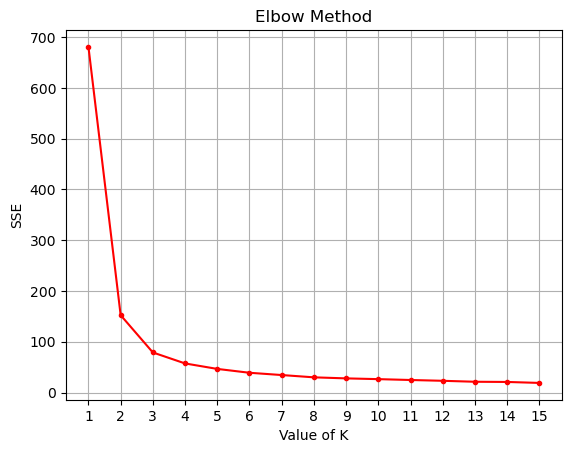

In [38]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='.', color='r')

#### Knee / Elbow locator

In [39]:
!pip install kneed

### Silhoutte Method

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [42]:
silh

[0.6808136202936816,
 0.5525919445499757,
 0.4972279726640147,
 0.4885175508886279,
 0.3682056968271308,
 0.35087596063049353,
 0.3511429985989619,
 0.3453516496437476,
 0.3174756949131561,
 0.31509538640581175,
 0.29380702279790616,
 0.2929502503042348,
 0.2896351453830605,
 0.2820630810375479]

<BarContainer object of 14 artists>

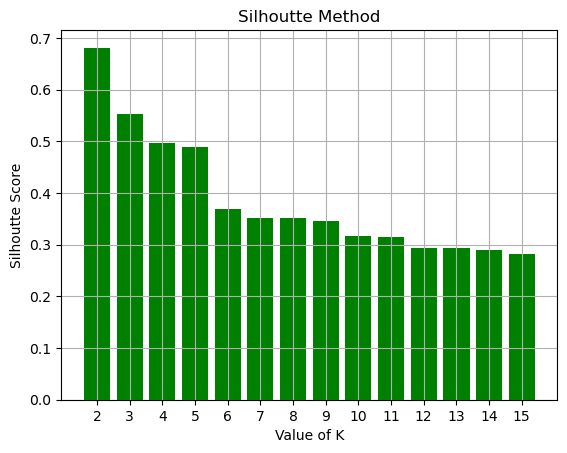

In [43]:
plt.title('Silhoutte Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color='g')

### Using Knee Locator

In [44]:
from kneed import KneeLocator

In [45]:
kl = KneeLocator(range(1, 16), sse, curve="convex", 
                 direction="decreasing")

In [46]:
kl.elbow

3

### Apply the KMeans Clustering Algorithm

In [17]:
km = KMeans(n_clusters=3)

In [18]:
labels = km.fit_predict(x)

In [19]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [20]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
km.inertia_

78.940841426146

In [22]:
cent = km.cluster_centers_

In [23]:
cent

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [24]:
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


### Separate the cluster

In [25]:
x[labels==0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
...,...,...,...,...
133,6.3,2.8,5.1,1.5
138,6.0,3.0,4.8,1.8
142,5.8,2.7,5.1,1.9
146,6.3,2.5,5.0,1.9


In [26]:
zero = df[labels==0]
one  = df[labels==1]
two  = df[labels==2]

In [27]:
len(zero),len(one),len(two)

(62, 50, 38)

In [62]:
zero.to_csv('zero.csv')

### Prediction on new data

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
new1 = [[5.1, 3.5, 1.4, 0.2]]
new2 = [[6.3, 2.5, 5.0, 1.9]]

In [74]:
print(km.predict(new1))
print(km.predict(new2))

[1]
[2]
